<b>Battleship</b> is a classic two person game, originally played with pen and paper.

On a grid (typically 10 x 10), players 'hide' ships of mixed length; horizontally or
vertically (not diagonally) without any overlaps. The exact types and number of ships
varies by rule, but for this posting, I'm using ships of lengths: 5, 4, 3, 3, 2 (which results
in 17 possible targets out of the total of 100 squares).

First, we try to make gameboard with enumerated squares.

In [1]:
# import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

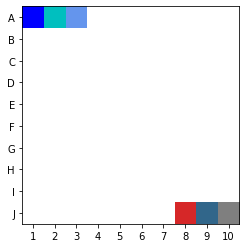

In [2]:
# create board image (initially completely white)
nrows, ncols = 10, 10
board = np.ones([nrows, ncols, 3])

# color some squares 
# there is an example about named colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
board[0, 0] = (0, 0, 1)  # rgb color
board[0, 1] = colors.to_rgb('c')  # base color
board[0, 2] = colors.to_rgb('cornflowerblue')  # css color
board[9, 7] = colors.to_rgb('tab:red')  # tabeau palette color
board[9, 8] = colors.to_rgb('xkcd:ugly blue')  # xkcd color
board[9, 9] = 0.5  # gray level color

# create labels
row_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
col_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

# create figure and axes, plot image
fig, ax = plt.subplots()
ax.imshow(board, origin='upper')

# show all ticks
ax.set_xticks(np.arange(ncols))
ax.set_yticks(np.arange(nrows))

# set custom labels
ax.set_xticklabels(row_labels)
ax.set_yticklabels(col_labels)

# set bounds explicitly (not setting it clips top and bottom of the image)
ax.set_xbound(-0.5, 9.5)
ax.set_ybound(-0.5, 9.5)

Next, we add function to select individual squares with hidden ships inside them.

In [3]:
# clear board
board = np.ones([nrows, ncols, 3])

In [4]:
# position should be a string or list of strings in [A-J][1-10] format
def hide_ship(*positions):
    for position in positions:
        row = ord(position[0]) - ord('A')
        col = int(position[1:]) - 1
        board[row, col] = colors.to_rgb('royalblue')

In [5]:
# also create function to unhide a ship
def unhide_ship(*positions):
    for position in positions:
        row = ord(position[0]) - ord('A')
        col = int(position[1:]) - 1
        board[row, col] = 1

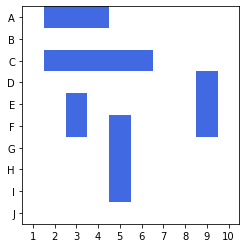

In [6]:
# test hide_ship function
hide_ship('A2', 'A3', 'A4')
hide_ship('C2', 'C3', 'C4', 'C5', 'C6')
hide_ship('E3', 'F3')
hide_ship('F5', 'G5', 'H5', 'I5')
hide_ship('D9', 'E9', 'F9')

# show gameboard on existing axes
ax.imshow(board, origin='upper')

# we are reusing created figure, so we need to type 'fig' instead of 'plt.show()'
# for more info, see: https://stackoverflow.com/questions/39338053/jupyter-replot-in-different-cell
fig

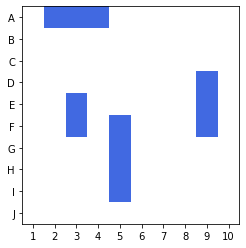

In [7]:
# test unhide_ship function
unhide_ship('C2', 'C3', 'C4', 'C5', 'C6')
ax.imshow(board, origin='upper')
fig